# CWL steps walkthrough

This notebook describes the processing done in the CWL pipeliene for a single block (1.2 s observation here) in a 2 min long observation. We are aiming to conduct much longer observations, 10 min at least.

rfipip is a custom package based on sigpyproc (source available https://github.com/pinsleepe/rfipip) and is pip installable. 

In [48]:
from rfipip import rfiObs, rfiDatabase
import numpy as np
from scipy import ndimage
from skimage import filters
from scipy.ndimage import measurements
import h5py
import matplotlib.pyplot as plt
%matplotlib inline  

South Celectial Pole (scp) observation is available on katai.

In [2]:
fil_path = '/data/rfi_data/scp.fil'

In [3]:
fil_rfiObs = rfiObs.RfiObservation(path=fil_path,
                                   fil_file=True)
header = fil_rfiObs.file.header
tobs = header.tobs
nchans = header.nchans

In [4]:
print tobs

120.21859529


The observation is divided into 100 blocks, but this bit will need some logic in the pipeline implementation.

In [5]:
vec_length = 100
start_vector = np.linspace(0, 
                           tobs, 
                           num=vec_length, 
                           endpoint=False, 
                           retstep=True)

In [6]:
duration = start_vector[1]
print duration

1.2021859529


Lets view only block 10th

In [53]:
sv = 10
start_time = start_vector[0][sv]
block, num_sam = fil_rfiObs.read_time_freq(start_time, 
                                           duration)

t_vector stores time vector of the block in seconds. This has to be translated into MJD.

In [8]:
t_vector = fil_rfiObs.time

Now we are using one of the threscholding algorithms available from scipy. I'm using Yen as it looked best for this type of observation. This has to be automated for the pipeline.

In [9]:
val = filters.threshold_yen(block)
mask = block < val

Threschold value changes for every block. We have to first read every block and find threschold. Find median and then open the filterbank file again to apply it. At the moment we don't use median threshold for speed reasons.

In [10]:
print mask.shape

(4096, 7851)


In [11]:
print val

3672.96813965


Plot mask.

Zoom in and decide what belongs to a single culprit.

I will explain the next 2 steps on a pulsar example in a different notebook. It essentially groups blobs depending on the mask.

In [12]:
# op_struck = np.ones((5, 5))
op_struck = np.ones((2, 2))
open_img = ndimage.binary_opening(mask,
                                  structure=op_struck)

In [13]:
cl_struck = np.ones((1, 1))
close_img = ndimage.binary_closing(open_img,
                                   structure=cl_struck)

Now we label the groups.

In [14]:
close_img_inv = np.invert(close_img)
labeled_array, num_features = measurements.label(close_img_inv)
print num_features

787


We found 787 events.

In [54]:
start_sample = long(start_time / header.tsamp)

In filterbank channel 0 is the highest frequency

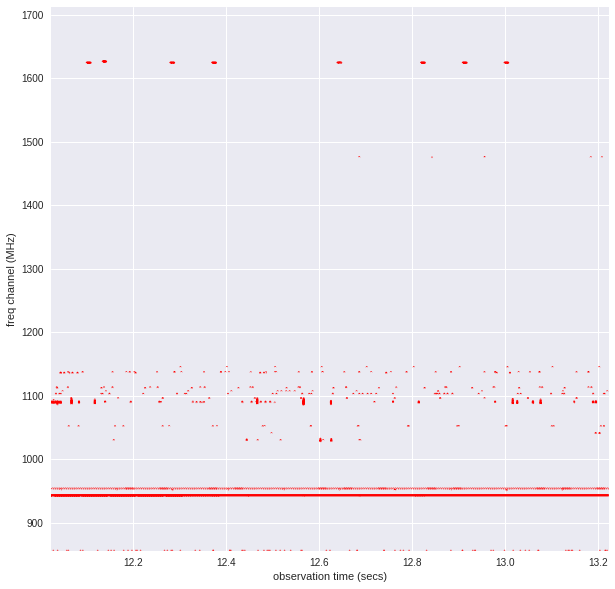

In [63]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
# plt.imshow(mask,
#            extent=[start_sample * header.tsamp,
#                    (start_sample + np.shape(block)[1]) * header.tsamp, 
#                    fil_rfiObs.freqs[0], fil_rfiObs.freqs[-1]], 
#           cmap=plt.cm.gray)
plt.contour(close_img, 
           [0.5], 
            extent=[start_sample * header.tsamp,
                   (start_sample + np.shape(block)[1]) * header.tsamp, 
                   fil_rfiObs.freqs[0], fil_rfiObs.freqs[-1]],
            origin='lower',
           linewidths=2, 
           colors='r')
ax.set_aspect("auto")
ax.set_xlabel('observation time (secs)')
ax.set_ylabel('freq channel (MHz)')

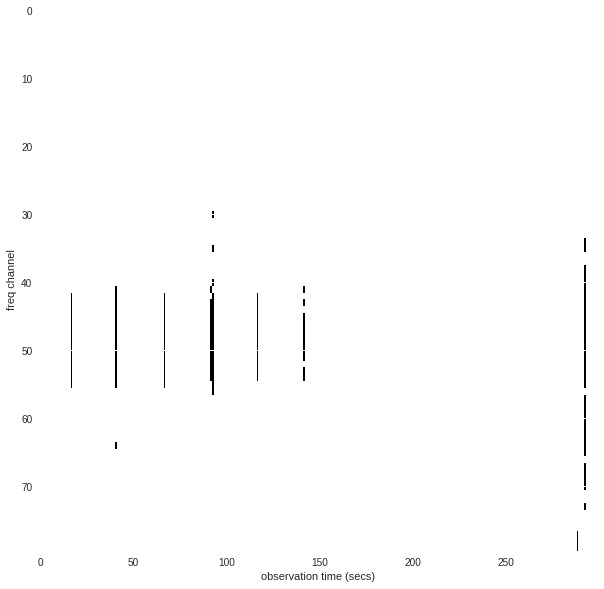

In [65]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.imshow(mask[1070:1150,0:300], 
          cmap=plt.cm.gray)
ax.set_aspect("auto")
ax.set_xlabel('observation time (secs)')
ax.set_ylabel('freq channel')

Zoom in on the mask.

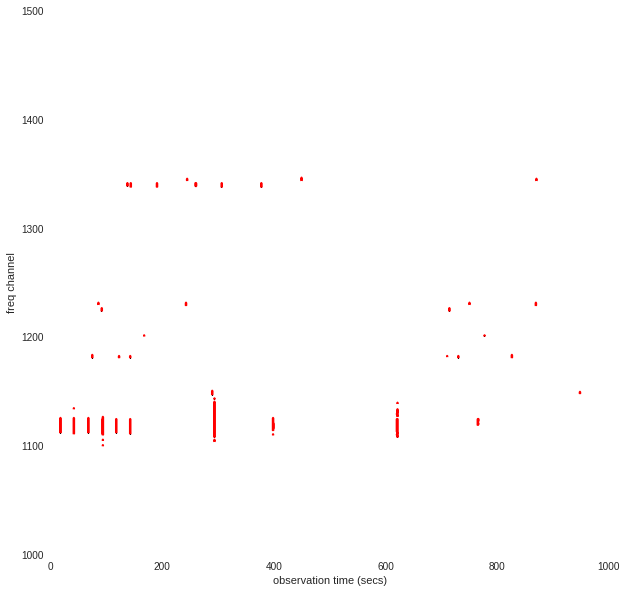

In [66]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.imshow(mask, 
          cmap=plt.cm.gray)
plt.contour(close_img, 
           [0.5], 
            origin='lower',
           linewidths=2, 
           colors='r')
ax.set_xlim(0, 1000)
ax.set_ylim(1000, 1500)
ax.set_aspect("auto")
ax.set_xlabel('observation time (secs)')
ax.set_ylabel('freq channel')

Zoom in. Should those be single events?

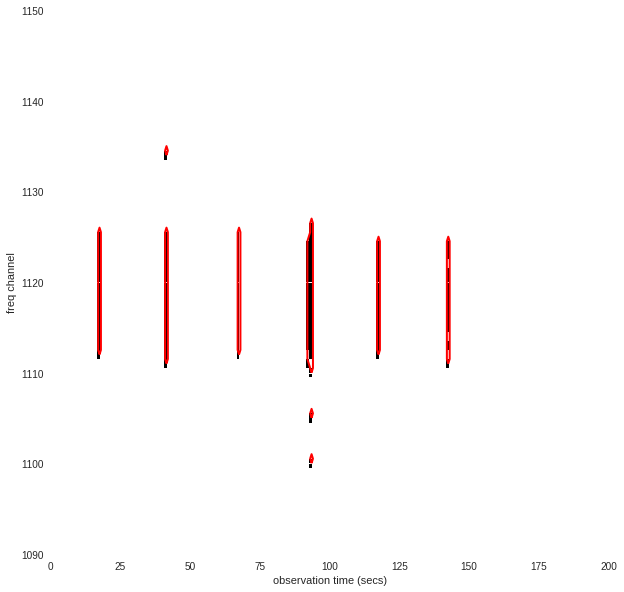

In [67]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.imshow(mask, 
          cmap=plt.cm.gray)
plt.contour(close_img, 
           [0.5], 
            origin='lower',
           linewidths=2, 
           colors='r')
ax.set_xlim(0, 200)
ax.set_ylim(1090, 1150)
ax.set_aspect("auto")
ax.set_xlabel('observation time (secs)')
ax.set_ylabel('freq channel')

Zoom in.

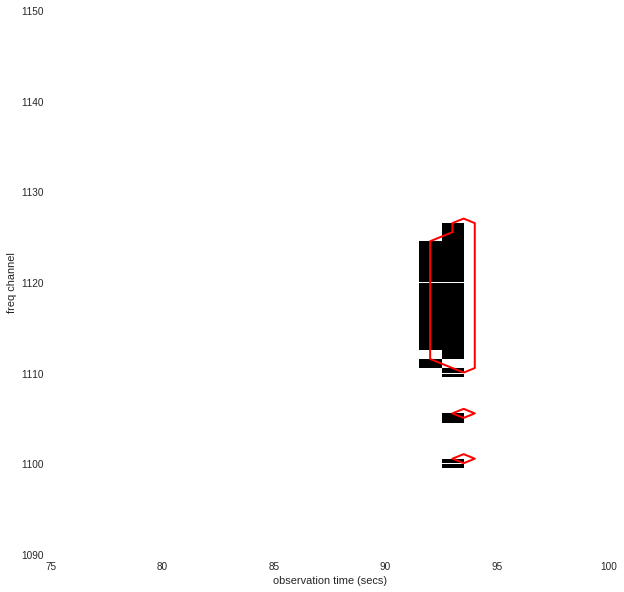

In [68]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.imshow(mask, 
          cmap=plt.cm.gray)
plt.contour(close_img, 
           [0.5], 
            origin='lower',
           linewidths=2, 
           colors='r')
ax.set_xlim(75, 100)
ax.set_ylim(1090, 1150)
ax.set_aspect("auto")
ax.set_xlabel('observation time (secs)')
ax.set_ylabel('freq channel')

Zoom in.

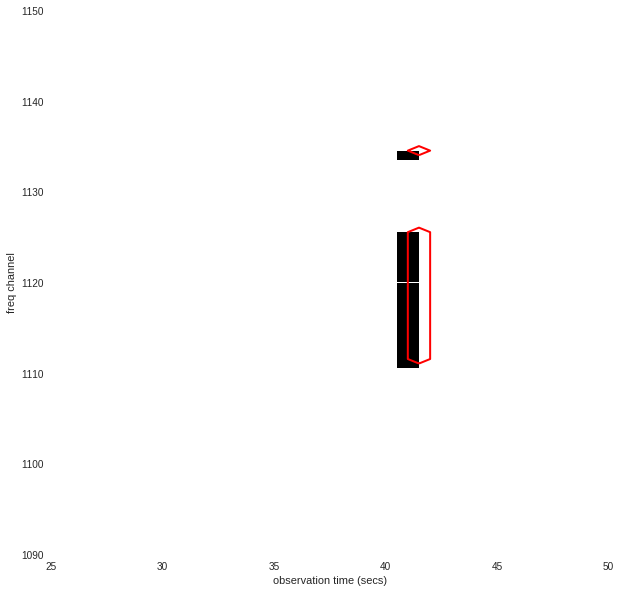

In [69]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.imshow(mask, 
          cmap=plt.cm.gray)
plt.contour(close_img, 
           [0.5], 
            origin='lower',
           linewidths=2, 
           colors='r')
ax.set_xlim(25, 50)
ax.set_ylim(1090, 1150)
ax.set_aspect("auto")
ax.set_xlabel('observation time (secs)')
ax.set_ylabel('freq channel')

Different region zoomed in.

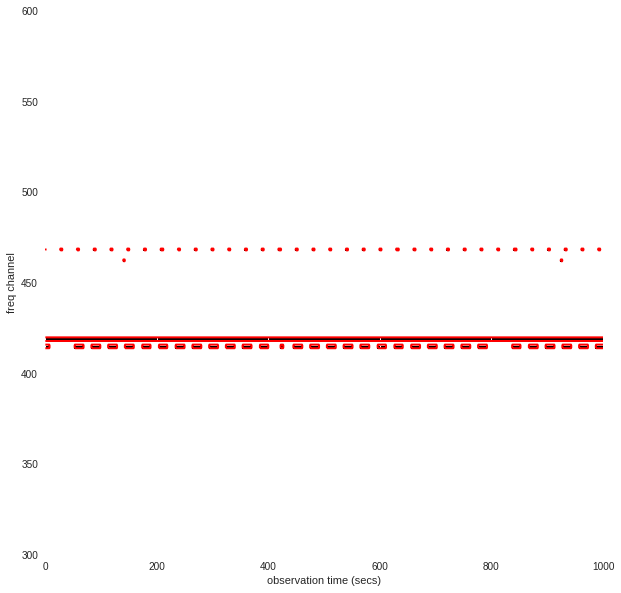

In [70]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.imshow(mask, 
          cmap=plt.cm.gray)
plt.contour(close_img, 
           [0.5], 
            origin='lower',
           linewidths=2, 
           colors='r')
ax.set_xlim(0, 1000)
ax.set_ylim(300, 600)
ax.set_aspect("auto")
ax.set_xlabel('observation time (secs)')
ax.set_ylabel('freq channel')

Zoom in.

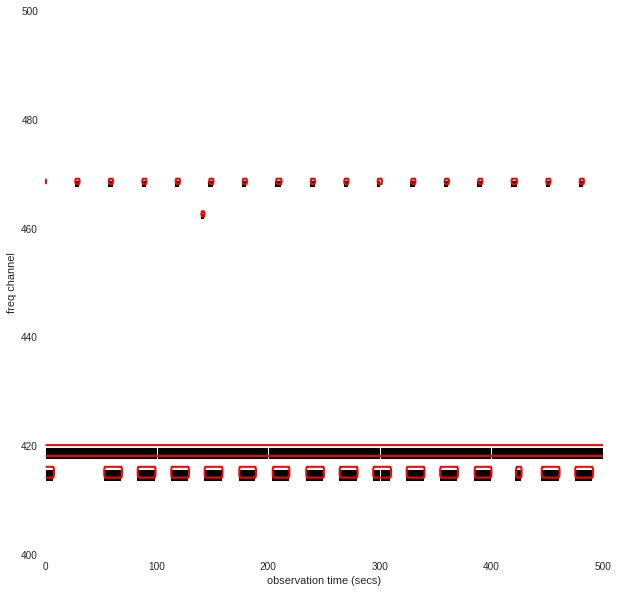

In [71]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.imshow(mask, 
          cmap=plt.cm.gray)
plt.contour(close_img, 
           [0.5], 
            origin='lower',
           linewidths=2, 
           colors='r')
ax.set_xlim(0, 500)
ax.set_ylim(400, 500)
ax.set_aspect("auto")
ax.set_xlabel('observation time (secs)')
ax.set_ylabel('freq channel')

Now we save each event with its time and channel occupacy. 

In [23]:
feature_range = np.linspace(1, num_features, num=num_features)

In [24]:
# x = freq
# y = time
x, y = np.where(labeled_array == 701)
print(x.shape)
print(y.shape)
print(x.min(), x.max())
print(y.min(), y.max())

(2,)
(2,)
(1230, 1231)
(1399, 1399)


In [25]:
tf_extent = np.empty([num_features, 5], 
                     dtype='int')
for ev in feature_range:
    x, y = np.where(labeled_array == ev)
    tf_e = [ev, 
            x[0], 
            x.max()-x[0], 
            y[0], 
            y.max()-y[0]]
    tf_extent[int(ev - 1), :] = tf_e

If array[2] or array[4] == 0 there was a single sample

In [26]:
tf_extent[700,:]

array([ 701, 1230,    1, 1399,    0])

In [27]:
labeled_array[1220:1241, 1395:1405]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 701,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 701,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [28]:
tf_extent

array([[   1,    0,    0,   37,    0],
       [   2,    0,    0,   97,    0],
       [   3,    0,    0,  227,    0],
       ..., 
       [ 785, 3677,    0, 6386,   19],
       [ 786, 3677,    0, 6408,   28],
       [ 787, 3686,    0,  733,   46]])

In [29]:
# idx of largest freq
tf_extent[:,2].argmax()

529

In [30]:
# idx of largest time
tf_extent[:,4].argmax()

163

In [31]:
tf_extent[163,:]

array([ 164,  418,    1,    0, 7850])

# Time occupancy

In [32]:
from matplotlib.ticker import FuncFormatter

In [33]:
norms = np.apply_along_axis(np.linalg.norm, 0, tf_extent[:,4])

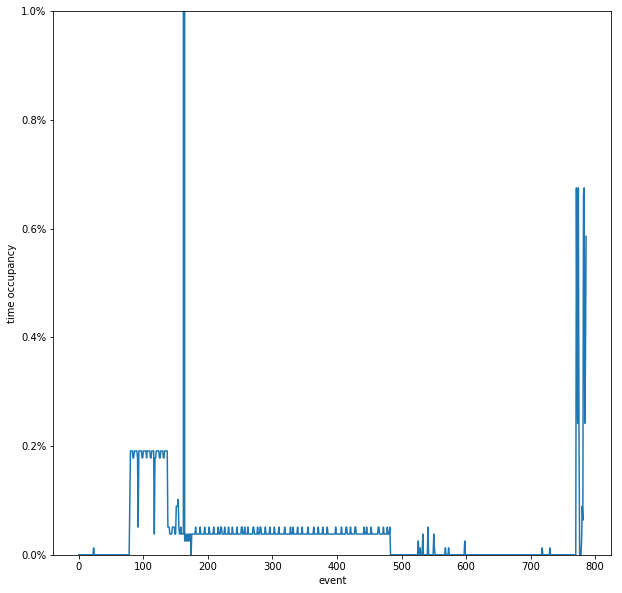

In [34]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.plot(tf_extent[:,4]/norms)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: 
                                           '{:.1%}'.format(y))) 
ax.set_ylim(0,.01)
plt.xlabel('event')
plt.ylabel('time occupancy')

# Freq channels occupancy

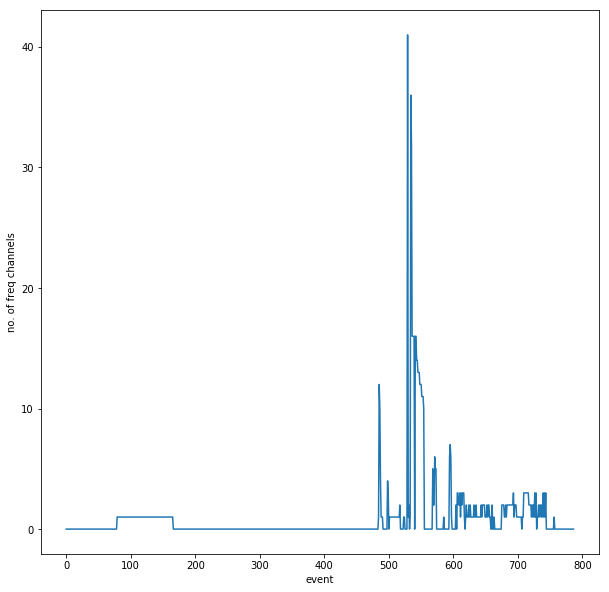

In [36]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.plot(tf_extent[:,2])
plt.xlabel('event')
plt.ylabel('no. of freq channels')

In [46]:
# plt.figure(figsize=(10, 10))
# ax = plt.subplot(1, 1, 1)
# plt.scatter(tf_extent[:,4], tf_extent[:,2])
# ax.set_xlim(0,60)
# plt.xlabel('event')
# plt.ylabel('no. of freq channels')

In [45]:
# import pandas as pd
# import seaborn as sns 

In [47]:
# x, y = df['MEDV'], df['LSTAT']
# plt.scatter(x, y, alpha=0.5)

# # or via jointplot (with histograms aside):
# sns.jointplot(x, y, kind='scatter', joint_kws={'alpha':0.5})

In [49]:
# tf_e = [ev, x[0], x.max()-x[0], y[0], y.max()-y[0]]

csv_path = '/data/rfi_data/RFI Spectrum Database - Sky-I.csv'
rfiDb = rfiDatabase.RfiDatabase()
rfiDb.write_dict([csv_path])
bands = rfiDb.dictionary.keys()
print bands
# TODO time occupancy

['300.0-470.0', '1526.0-1554.0', '1467.0-1492.0', '2600.0-5180.0', '47.0-87.5', '580.0-1015.0', '900.0-1670.0', '1618.0-1626.0', '137.0-174.0', '100.0-104.0', '967.0-1164.0', '104.0-107.0', '470.0-876.0', '70.0-250.0', '876.0-967.0', '8000.0-14500.0', '2100.0-2300.0', '108.0-137.0', '174.0-300.0', '87.5-108.0', '1920.0-2100.0', '5180.0-5320.0', '9340.0-10060.0', '1164.0-1710.0', '1875.0-1920.0', '1750.0-3500.0', '1710.0-1875.0', '2300.0-2600.0', '5500.0-5700.0', '4500.0-5500.0']


In [82]:
training_set = pd.DataFrame(columns=('event',
                                     'c_freq',
                                     'bw',
                                     't_start', 
                                     'duration',
                                     'culprit', 
                                     'band'))

In [83]:
print fil_rfiObs.freqs
print fil_rfiObs.time

[  856.           856.20898438   856.41796875 ...,  1711.37304688
  1711.58203125  1711.79101562]
[ 12.02185953  12.02201267  12.02216582 ...,  13.22373919  13.22389234
  13.22404548]


In [84]:
pd_idx = 0
t_df = fil_rfiObs.time[tf_extent[0][1]] - fil_rfiObs.time[tf_extent[0][1]]
for ev in range(tf_extent.shape[0]):
    # logic for centre freq
    if tf_extent[ev][2] > 0:
        temp_bw = tf_extent[ev][2]*header.foff
        peak_freq = fil_rfiObs.freqs[tf_extent[ev][1]] + temp_bw/2.0
    else:
        peak_freq = fil_rfiObs.freqs[tf_extent[ev][1]]
        temp_bw = header.foff
    ev_f = peak_freq
    temp_t = fil_rfiObs.time[tf_extent[ev][3]]
    temp_dur = tf_extent[ev][4]*t_df
    # find freq range
    for key in bands:
        top = float(key.split('-')[1])
        bottom = float(key.split('-')[0])
        band = rfiDb.dictionary[key]['band']
        if bottom <= ev_f <= top:  # freq is in range
            for av_f in rfiDb.dictionary[key]['frequencies'].keys():
                if av_f == []:  # culprit unknown
                    label = 0
                    training_set.loc[pd_idx] = [tf_extent[ev][0], 
                                                peak_freq, 
                                                temp_bw, 
                                                temp_t, 
                                                temp_dur, 
                                                label, 
                                                band]
#                     training_set.loc[pd_idx] = [ev_f, 0, label, band]
                    pd_idx += 1
                else:
                    c_range = 0.00001 # MHz
                    # floor it as we don't have that much resolution
                    if (float(av_f) - c_range) <= ev_f <= (float(av_f) + c_range):  # known culprit
                        label = 1
                        training_set.loc[pd_idx] = [tf_extent[ev][0], 
                                                peak_freq, 
                                                temp_bw, 
                                                temp_t, 
                                                temp_dur, 
                                                label, 
                                                band]
                        pd_idx += 1
                    else: # culprit unknown
                        label = 0
                        training_set.loc[pd_idx] = [tf_extent[ev][0], 
                                                peak_freq, 
                                                temp_bw, 
                                                temp_t, 
                                                temp_dur, 
                                                label, 
                                                band]
                        pd_idx += 1

In [85]:
training_set.loc[lambda df: df.culprit > 0, :]

,event,c_freq,bw,t_start,duration,culprit,band


In [86]:
training_set

,event,c_freq,bw,t_start,duration,culprit,band
0,1.0,856.000000,0.208984,12.027526,0.0,0.0,10.0
1,1.0,856.000000,0.208984,12.027526,0.0,0.0,10.0
2,1.0,856.000000,0.208984,12.027526,0.0,0.0,10.0
3,1.0,856.000000,0.208984,12.027526,0.0,0.0,10.0
4,1.0,856.000000,0.208984,12.027526,0.0,0.0,10.0
5,1.0,856.000000,0.208984,12.027526,0.0,0.0,10.0
6,1.0,856.000000,0.208984,12.027526,0.0,0.0,10.0
7,1.0,856.000000,0.208984,12.027526,0.0,0.0,9.0
8,1.0,856.000000,0.208984,12.027526,0.0,0.0,9.0
9,1.0,856.000000,0.208984,12.027526,0.0,0.0,9.0
